In [1]:
from __future__ import print_function
from ROOT import TFile
import ROOT
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from math import sqrt,cos,acos,pi,exp,sin,atan2,log
from numpy import arange,mean,asarray,isnan,isinf
import pickle
from scipy import stats
from root_pandas import read_root

from numpy import mean,std,asarray,vstack
from scipy.stats import gaussian_kde
import csv
import sys
import pandas as pd
import os
from os import path

from SelectionHelper import BDTensemble,sysselection

datafolder = '/home/nwkamp/Research/MicroBooNE/Data'
sysfolder = '/home/nwkamp/Research/MicroBooNE/Data/systematics'
auxfolder = '/home/nwkamp/Research/MicroBooNE/1L1PSelection/aux'
dumpfolder = 'PlotDumps'

RSE  = ['run','subrun','event']
RSEV = ['run','subrun','event','vtxid']
RSECV = ['run','subrun','event',"isCV"]

good_run1_df = pd.read_csv('%s/pass_r1.txt'%auxfolder)
good_run2_df = pd.read_csv('%s/pass_r2.txt'%auxfolder)
good_run3_df = pd.read_csv('%s/pass_r3.txt'%auxfolder)

good_run1_df['good'] = 1
good_run2_df['good'] = 1
good_run3_df['good'] = 1

C1_POT = 1.558e+20 + 1.129e+17 + 1.869e+19
D2_POT = 1.63e+20 + 2.964e+19 + 1.239e+19
E1_POT = 5.923e+19
F1_POT = 4.3e+19
G1_POT = 1.701e+20 + 2.97e+19 + 1.524e+17

DAT_POT1 = C1_POT
DAT_POT3 = E1_POT+D2_POT+F1_POT+G1_POT


Welcome to JupyROOT 6.16/00


In [2]:
tag='3March2021_vA_fullLowE_withPi0Sample_newShowerCalib'
BDTnumlist=range(20)
nBDTs = len(BDTnumlist)
oldBDT = False


ensemble = BDTensemble(tag,BDTnumlist,oldBDT=oldBDT)


SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R1_0_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R1_0_overlay_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R1_1_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:

SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R1_13_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R1_13_overlay_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R1_14_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.

SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_2_ccpi0.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_2_ncpi0.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_3_ext.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Em

SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_8_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_8_overlay_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_8_ccpi0.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserW

SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_14_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_14_overlay_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_14_ccpi0.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: Us

SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_19_ccpi0.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R2_19_ncpi0.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R3_0_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarnin

SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R3_13_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R3_13_overlay_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.py:281: UserWarning: loadtxt: Empty input file: "/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/BDTWeights/new/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/ValSample_R3_14_intrinsics_lowE.txt"
  self.valrse[r][b][filetag] = np.loadtxt(bdtsavedir+'ValSample_R%i_%i_%s.txt'%(r,b,filetag),dtype=int)
SelectionHelper.

In [12]:
df_mc_detvarweight_r1 = read_root('%s/weights_forCV_v48_Sep24_bnb_nu_DetVar_run1.root'%auxfolder).drop_duplicates(RSE)
df_mc_detvarweight_r3 = read_root('%s/weights_forCV_v48_Sep24_bnb_nu_DetVar_run3.root'%auxfolder).drop_duplicates(RSE)

def performSysSelection(dv,run,sigcutlist,modelist):
    
    flist = {}
    dflist = {}
    for sigcut in sigcutlist:
        for mode in modelist:
            k = tuple((sigcut,mode))
            dflist[k] = {}
    rstr = str(run)
    originalfile = sysfolder+'/NA'
    if run==3 and dv != 'Recomb2': rstr = '3b'
    lowBDTfile = sysfolder+'/mcc9_v40_bnb_nu_overlay_run%s_detvar_%s_nu1e1p_lowBDT_v1_1_3_fvv.root'%(rstr,dv)
    signalfile = sysfolder+'/mcc9_v40_bnb_nu_overlay_run%s_detvar_%s_nu1e1p_signal_v1_1_3_fvv.root'%(rstr,dv)
    if dv=='CV':
        if run==1:
            lowBDTfile = sysfolder+'/mcc9_bnb_nu_overlay_CV_run1_500k_nu1e1p_lowBDT_v1_1_3_fvv.root'
            signalfile = sysfolder+'/mcc9_bnb_nu_overlay_CV_run1_500k_nu1e1p_signal_v1_1_3_fvv.root'
            originalfile = sysfolder+'/../run1_overlay_stripmine.root'
        if run==3:
            lowBDTfile = sysfolder+'/mcc9_v40_bnb_nu_overlay_run3b_CV_v1_1_3_fvv_nu1e1p_lowBDT.root'
            signalfile = sysfolder+'/mcc9_v40_bnb_nu_overlay_run3b_CV_v1_1_3_fvv_nu1e1p_signal.root'
            originalfile = sysfolder+'/../mcc9_v29e_dl_run3b_bnb_nu_overlay_nocrtremerge_finalbdt.root'
        
    if dv=='LYAttenuation' and run==1:
        lowBDTfile = sysfolder+'/mcc9_bnb_nu_overlay_DetVar_LYAttenuation_run1_500k_nu1e1p_lowBDT_v1_1_3_fvv.root'
        signalfile = sysfolder+'/mcc9_bnb_nu_overlay_DetVar_LYAttenuation_run1_500k_nu1e1p_signal_v1_1_3_fvv.root'
    if os.path.exists(lowBDTfile):
        flist['lowBDT'] = TFile.Open(lowBDTfile)
    if os.path.exists(signalfile):
        flist['signal'] = TFile.Open(signalfile)
    if os.path.exists(originalfile):
        flist['original'] = TFile.Open(originalfile)
    print(flist.keys())
    if not flist.keys(): return -1,-1

    dfrse = read_root(signalfile,'dlana/FinalVertexVariables')[RSE]
    #dfrse = pd.concat([read_root(lowBDTfile)[RSE],read_root(signalfile)[RSE]])
    
    for k,f in flist.items():
        t = f.Get('dlana/FinalVertexVariables')
        if not t: t = f.Get('FinalVertexVariables')
        print('%s... %i entries'%(k,t.GetEntries()))
        df = sysselection(t,run,k,ensemble,overlay=True)
        print('Making cuts...')
        for sigcut in sigcutlist:
            for mode in modelist:
                dfc = df.copy()
                ensemble.MakeBDTcut(dfc,sigcut,mode)
                key = tuple((sigcut,mode))
                dflist[key][k] = dfc
    
    dfret = {}
    for sigcut in sigcutlist:
        for mode in modelist:
            key = tuple((sigcut,mode))
            dfret[key] = pd.concat([dflist[key][k] for k in flist.keys()])
        
    return dfret,dfrse
    
    
    

def getFullDetvarDF_1e1p(dv,run,dfd_cv,dfrse_cv,POTCV,POTDV,sigcutlist,modelist):
    
    if run=='1':
        df_goodrun = good_run1_df
        df_wgts = df_mc_detvarweight_r1
    elif run=='3':
        df_goodrun = good_run3_df
        df_wgts = df_mc_detvarweight_r3
    else:
        print('Select either run 1 or run 3! Exiting...')
        return -1
    
    dfd_dv,dfrse_dv = performSysSelection(dv,int(run),sigcutlist,modelist)
    if dfd_dv==-1: return -1
    
    dfd_full = {}
    for k in dfd_dv.keys():
        df_cv = dfd_cv[k].copy()
        df_dv = dfd_dv[k]
        rseShared = dfrse_cv.merge(dfrse_dv,on=RSE,how='inner').drop_duplicates(RSE)
        #df_cv = df_cv.merge(rseShared,on=RSE,how='inner')
        #df_dv = df_dv.merge(rseShared,on=RSE,how='inner')
        df_cv['isCV'] = True
        df_dv['isCV'] = False
        df_cv['POT']  = POTCV
        df_dv['POT'] = POTDV

        #df_cv['POT']  = df_cv.apply(lambda row: POTCV['standard'] + int(row.Etrue<400)*POTCV['low'] + int(row.Etrue>400 and row.Etrue<800)*POTCV['high'], axis=1)
        #df_dv['POT'] = df_dv.apply(lambda row: POTDV['standard'] + int(row.Etrue<400)*POTDV['low'] + int(row.Etrue>400 and row.Etrue<800)*POTDV['high'], axis=1)



        df_full = pd.concat((df_cv,df_dv))
        #print(k,'df_full = %2.2f  cv = %2.2f , dv = %2.2f'%(sum(df_full.query('Enu_1e1p < 1200')['bdtweight']),sum(df_cv.query('Enu_1e1p<1200')['bdtweight']),sum(df_dv.query('Enu_1e1p<1200')['bdtweight'])))

        df_full = df_full.join(df_wgts.set_index(RSE)['xsec_corr_weight'],on=RSE)
        dfd_full[k] = df_full  
    return dfd_full




In [16]:
run1POT = {
    "CV":  6.0936273419E+20 + 1.33681555217E+21,
    "LYRayleigh": 6.74276740522E+20,
    "LYDown": 5.94452048286E+20,
    "LYAttenuation" : 5.80561627636E+20,
    "Recomb2":6.27484668519E+20,
    "SCE":6.21993777143E+20
}
run3POT = {
    "CV": 5.79534847421E+20 + 8.98773223801e+20,
    "LYRayleigh": 1.30830317061E+21,
    "LYDown": 1.21808316832E+21,
    "LYAttenuation" : 1.21283308703E+21,
    "Recomb2" : 6.37062455184E+20,
    "SCE" : 5.89862945464E+20,
    "WireModX" : 1.30915319237E+21,
    "WireModYZ" : 1.31097060608E+21,
    "WireModThetaXZ" : 1.29697772584E+21,
    "WireModThetaYZ" : 1.26402704519E+21
}
    
modelist = ['avgscore']
sigcutlist = [0.95]


run = '1'
wvec1 = {}
print('DOING RUN 1')
print('#'*5,'CV','#'*5)
dfd_cv,rse_cv = performSysSelection('CV',int(run),sigcutlist,modelist)
for dv in run1POT.keys():
    print('#'*5,dv,'#'*5)
    dfd_bnb_wCV_wPass_wProc = getFullDetvarDF_1e1p(dv,run,dfd_cv,rse_cv,run1POT['CV'],run1POT[dv],sigcutlist,modelist)
    if dfd_bnb_wCV_wPass_wProc == -1: continue
    wvec1[dv] = {}
    for sigcut in sigcutlist:
        for mode in modelist: 
            key = tuple((sigcut,mode))
            dfDV = dfd_bnb_wCV_wPass_wProc[key].query('isCV==False and Enu_1e1p < 1200')
            wDV = dfDV['bdtweight'] * dfDV['POT']**(-1) # * dfDV['xsec_corr_weight']
            dfCV = dfd_bnb_wCV_wPass_wProc[key].query('isCV==True and Enu_1e1p < 1200')
            wCV = dfCV['bdtweight'] * dfCV['POT']**(-1) # * dfDV['xsec_corr_weight']
            
            wvec1[dv][key] = np.array(wDV)
            print(key,np.sum(wDV)*DAT_POT1,np.sum(wCV)*DAT_POT1)
            
run = '3'
#wvec3 = {}
print('DOING RUN 3')
print('#'*5,'CV','#'*5)
dfd_cv,rse_cv = performSysSelection('CV',int(run),sigcutlist,modelist)
for dv in run3POT.keys():
    print('#'*5,dv,'#'*5)
    dfd_bnb_wCV_wPass_wProc = getFullDetvarDF_1e1p(dv,run,dfd_cv,rse_cv,run3POT['CV'],run3POT[dv],sigcutlist,modelist)
    if dfd_bnb_wCV_wPass_wProc == -1: continue
    wvec3[dv] = {}
    for sigcut in sigcutlist:
        for mode in modelist: 
            key = tuple((sigcut,mode))
            dfDV = dfd_bnb_wCV_wPass_wProc[key].query('isCV==False and Enu_1e1p < 1200')
            wDV = dfDV['bdtweight'] * dfDV['POT']**(-1) # * dfDV['xsec_corr_weight']
            dfCV = dfd_bnb_wCV_wPass_wProc[key].query('isCV==True and Enu_1e1p < 1200')
            wCV = dfCV['bdtweight'] * dfCV['POT']**(-1) # * dfDV['xsec_corr_weight']
            
            wvec3[dv][key] = np.array(wDV)
            print(key,np.sum(wDV)*DAT_POT3,np.sum(wCV)*DAT_POT3)
            
            

DOING RUN 3
##### CV #####
['signal', 'original', 'lowBDT']
signal... 176 entries
Making cuts...
original... 314302 entries
Making cuts...
lowBDT... 23953 entries
Making cuts...
##### LYAttenuation #####
['signal', 'lowBDT']
signal... 323 entries
Making cuts...
lowBDT... 48880 entries
Making cuts...
(0.7, 'fracweight') 12.378856745049069 12.591891664781826
(0.7, 'medianscore') 10.45511549412928 10.636202768616801
(0.7, 'avgscore') 8.782297015068595 10.29309945350013
(0.75, 'fracweight') 10.120551798317145 11.288099067338477
(0.75, 'medianscore') 7.109478536007911 9.949996138383458
(0.75, 'avgscore') 5.854864676712397 8.577582877916777
(0.8, 'fracweight') 8.092259392456063 9.829909978092624
(0.8, 'medianscore') 5.854864676712397 9.263789508150118
(0.8, 'avgscore') 4.6002508174168835 6.86206630233342
(0.85, 'fracweight') 6.063966986594983 8.148703734020938
(0.85, 'medianscore') 4.6002508174168835 6.86206630233342
(0.85, 'avgscore') 2.9274323383561986 6.175859672100078
(0.9, 'fracweight')

WireModX 82
SCE 198
WireModYZ 82
Recomb2 198
WireModThetaYZ 82
WireModThetaXZ 82
LYRayleigh 198
LYDown 198
CV 198
LYAttenuation 198
WireModX 73
SCE 174
WireModYZ 73
Recomb2 174
WireModThetaYZ 73
WireModThetaXZ 73
LYRayleigh 174
LYDown 174
CV 174
LYAttenuation 174
WireModX 65
SCE 158
WireModYZ 65
Recomb2 158
WireModThetaYZ 65
WireModThetaXZ 65
LYRayleigh 158
LYDown 158
CV 158
LYAttenuation 158
WireModX 53
SCE 127
WireModYZ 53
Recomb2 127
WireModThetaYZ 53
WireModThetaXZ 53
LYRayleigh 127
LYDown 127
CV 127
LYAttenuation 127
WireModX 42
SCE 102
WireModYZ 42
Recomb2 102
WireModThetaYZ 42
WireModThetaXZ 42
LYRayleigh 102
LYDown 102
CV 102
LYAttenuation 102
WireModX 33
SCE 72
WireModYZ 33
Recomb2 72
WireModThetaYZ 33
WireModThetaXZ 33
LYRayleigh 72
LYDown 72
CV 72
LYAttenuation 72
WireModX 31
SCE 79
WireModYZ 31
Recomb2 79
WireModThetaYZ 31
WireModThetaXZ 31
LYRayleigh 79
LYDown 79
CV 79
LYAttenuation 79
WireModX 29
SCE 71
WireModYZ 29
Recomb2 71
WireModThetaYZ 29
WireModThetaXZ 29
LYRayleig

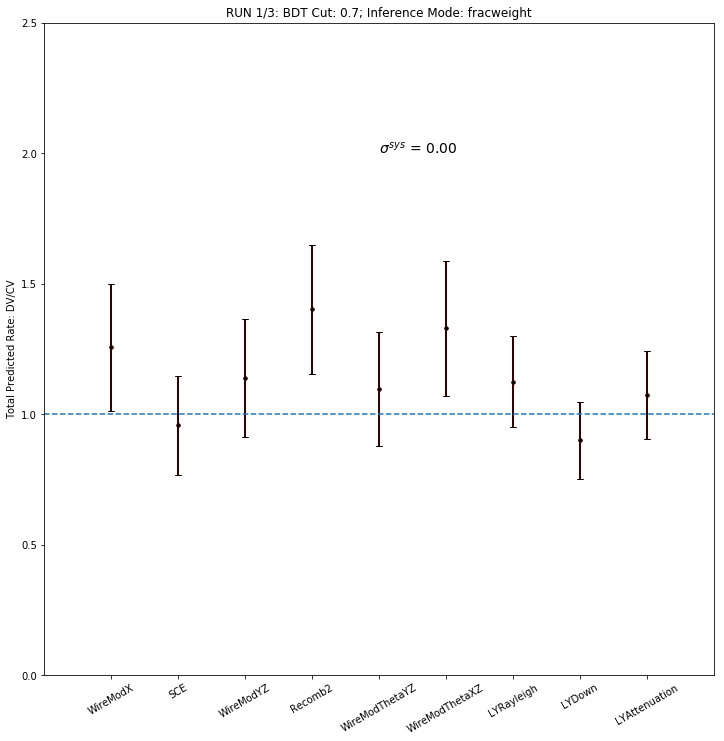

13.67647256589334 11.288099067338482
13.398155163355462 15.554084333533272
12.206643799474683 11.288099067338482
21.3479047885828 15.554084333533272
11.797251187579239 11.288099067338482
14.938971806513681 11.288099067338482
16.855672840315002 15.554084333533272
13.462021190200177 15.554084333533272
15.624244977300952 15.554084333533272


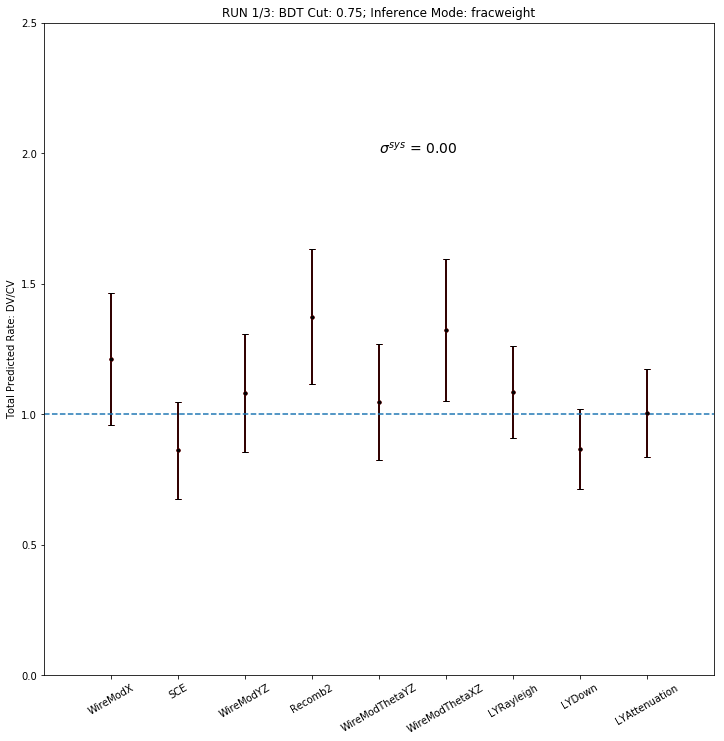

11.758666922800646 9.829909978092626
11.048556870644694 13.467884795005332
9.96263321193259 9.829909978092626
17.985076666603586 13.467884795005332
9.831042656316038 9.829909978092626
12.455661048101067 9.829909978092626
14.09496524909565 13.467884795005332
11.024186842021152 13.467884795005332
12.708745201057235 13.467884795005332


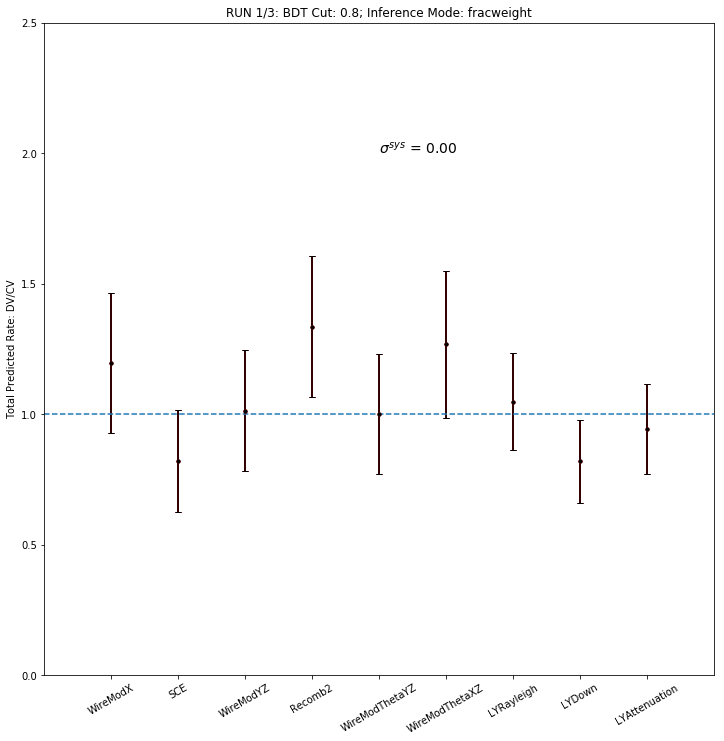

9.58902821546347 8.148703734020938
8.462124659755165 11.095867056723334
7.544518354667392 8.148703734020938
14.342060034954024 11.095867056723334
7.323123611337453 8.148703734020938
10.226547453935414 8.148703734020938
11.037128858044971 11.095867056723334
8.956099959397115 11.095867056723334
10.063918859845513 11.095867056723334


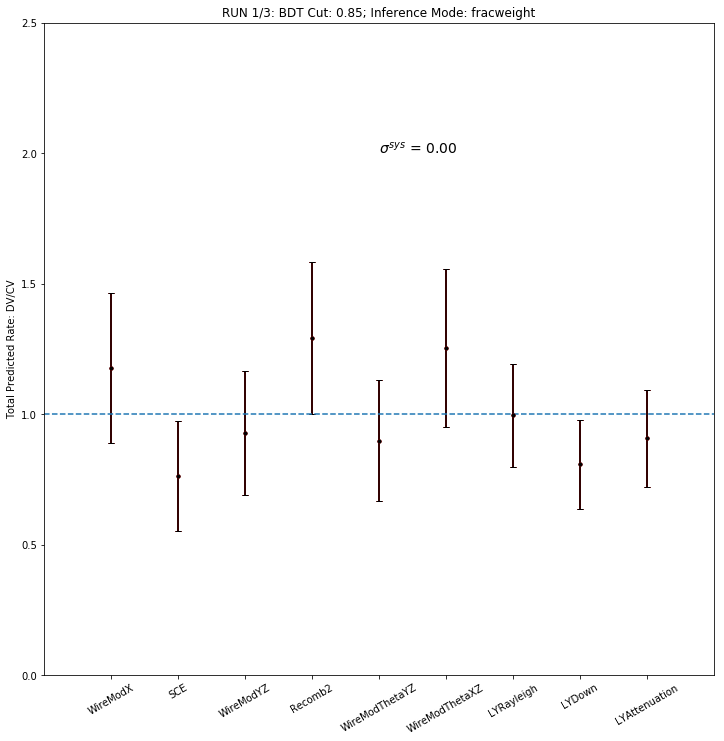

7.012582250500555 6.553273318728415
6.630229153741062 8.719909368751647
5.61002646885524 6.553273318728415
10.697515703976045 8.719909368751647
5.477295194233219 6.553273318728415
7.508593159294835 6.553273318728415
8.108546049859532 8.719909368751647
6.558607556535339 8.719909368751647
7.035414069994135 8.719909368751647


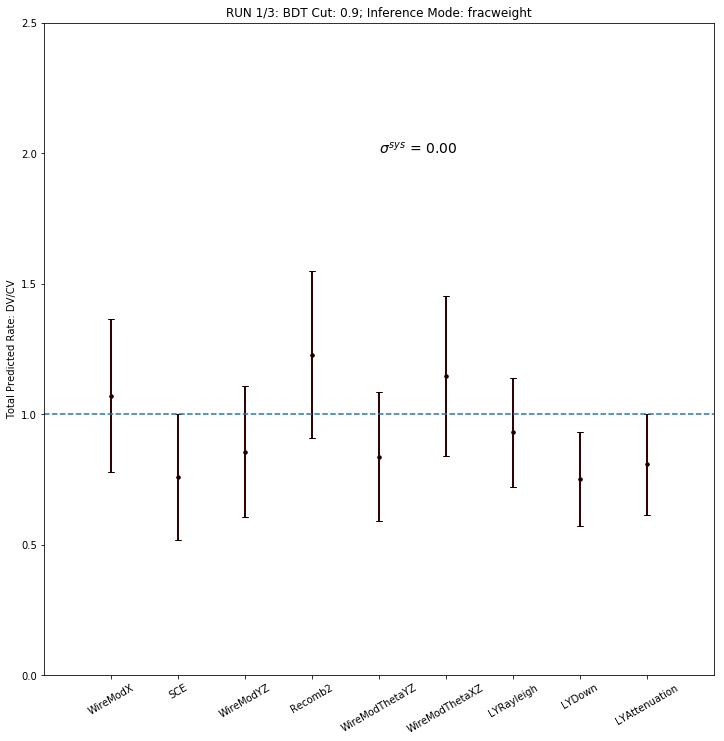

3.506291125250278 4.185860444423388
4.410499987251891 5.388051875906253
2.979117504150715 4.185860444423388
6.356520536287199 5.388051875906253
3.029566206334124 4.185860444423388
4.360459048236325 4.185860444423388
4.785544924406274 5.388051875906253
3.8601407023831085 5.388051875906253
4.321722312782007 5.388051875906253


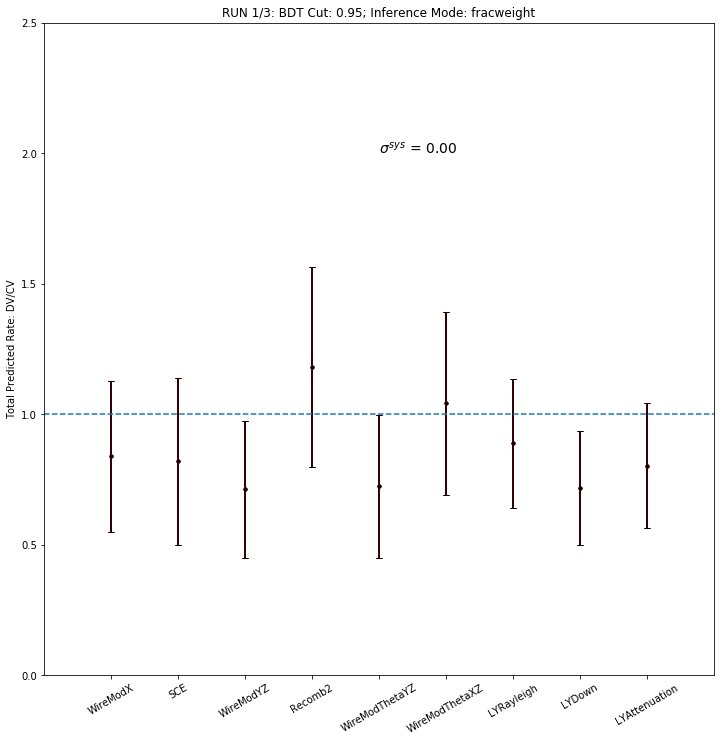

13.56024192085743 10.636202768616803
15.652163830140271 14.942560135122601
13.541443200685084 10.636202768616803
21.565846622417254 14.942560135122601
12.439278463093753 10.636202768616803
15.251829854817633 10.636202768616803
18.104326787344625 14.942560135122601
13.075932161946572 14.942560135122601
16.770828978209085 14.942560135122601


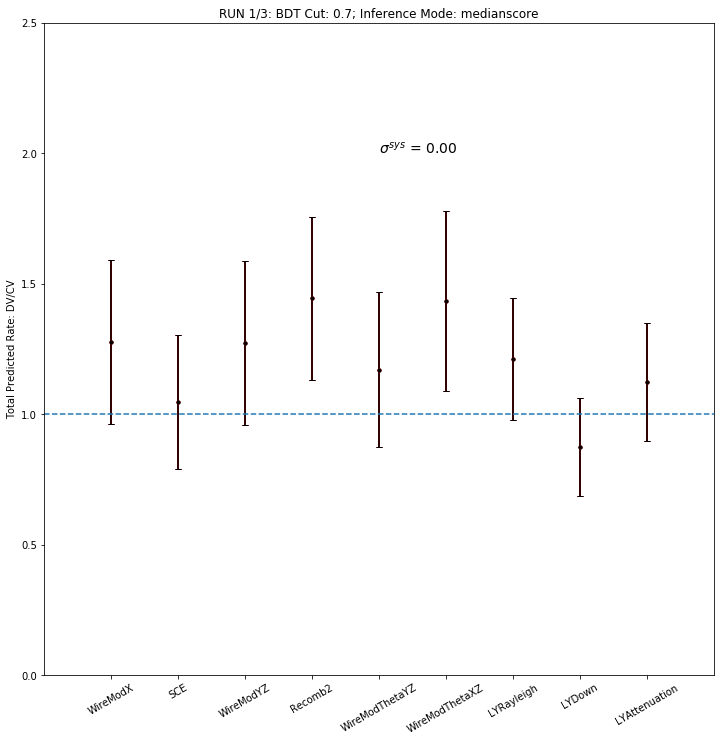

12.010499987045153 9.94999613838346
11.651206974128948 13.718058834076032
10.0593578062232 9.94999613838346
20.213156014475203 13.718058834076032
10.834210274307463 9.94999613838346
14.078612173677815 9.94999613838346
13.836825799457364 13.718058834076032
9.819038627708585 13.718058834076032
12.222198975501083 13.718058834076032


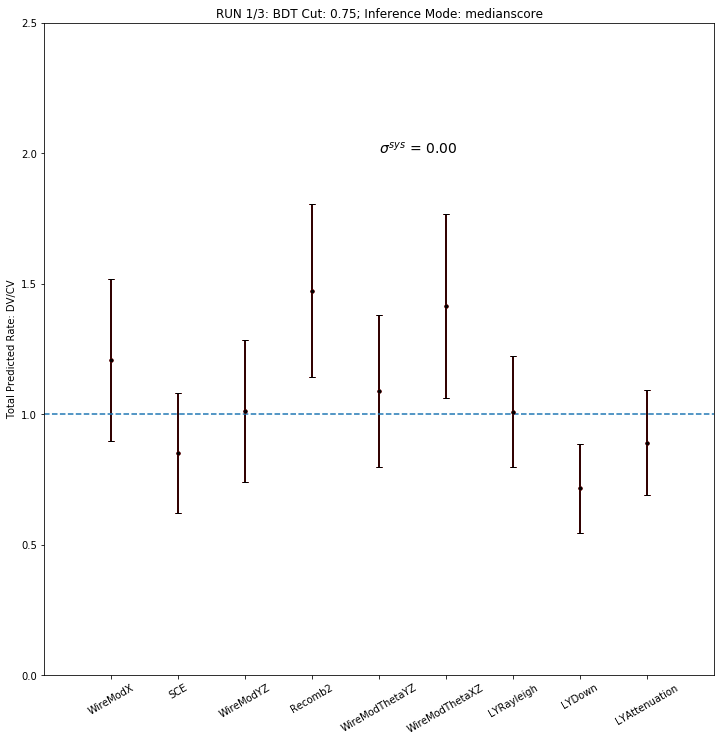

11.235629020139013 9.263789508150117
9.107035995388836 12.224410197622852
8.511764297573475 9.263789508150117
17.786033230645067 12.224410197622852
8.426607991128026 9.263789508150117
11.34110425101824 9.263789508150117
12.672293318956887 12.224410197622852
9.52531788016732 12.224410197622852
10.065340332765594 12.224410197622852


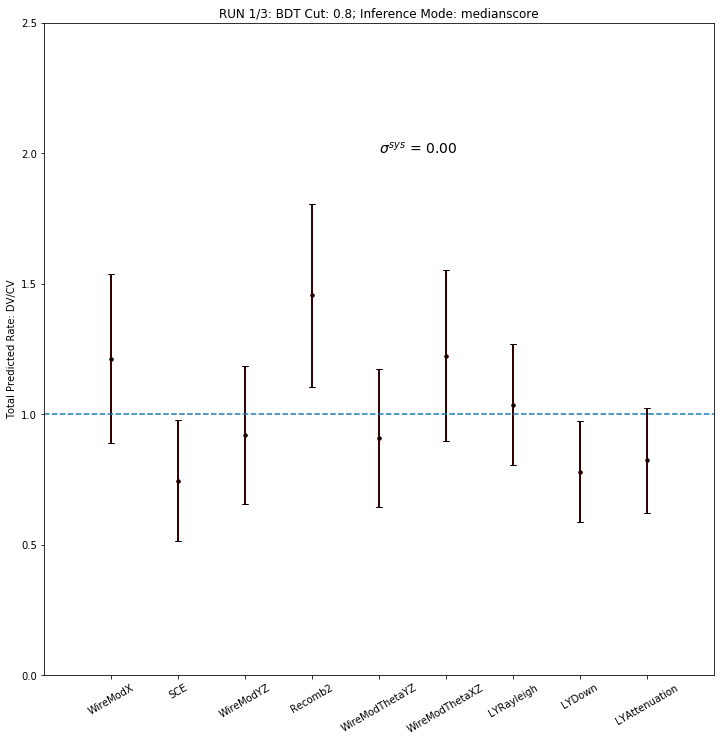

8.911016119420596 6.862066302333418
7.106557567383175 9.194676542524055
6.190374034598889 6.862066302333418
13.210046095038761 9.194676542524055
6.420272755145163 6.862066302333418
8.994668888738605 6.862066302333418
9.18163760619285 9.194676542524055
7.6886700586410335 9.194676542524055
7.908481690030108 9.194676542524055


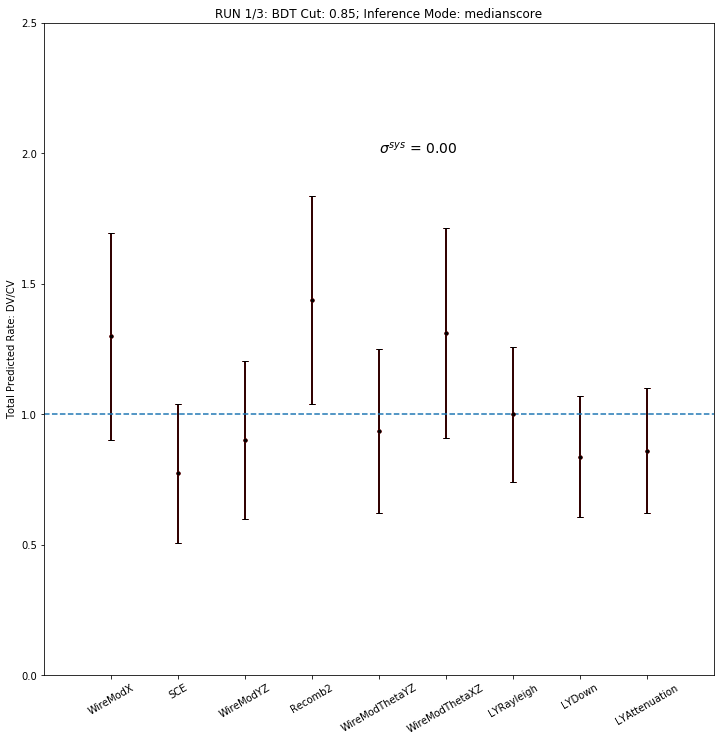

5.42409676834297 6.175859672100077
5.68524605390654 7.970175241477488
5.416577280274028 6.175859672100077
9.986749567374508 7.970175241477488
4.815204566358872 6.175859672100077
7.039306086838909 6.175859672100077
5.949930318469884 7.970175241477488
5.019218019485576 7.970175241477488
5.516710330057596 7.970175241477488


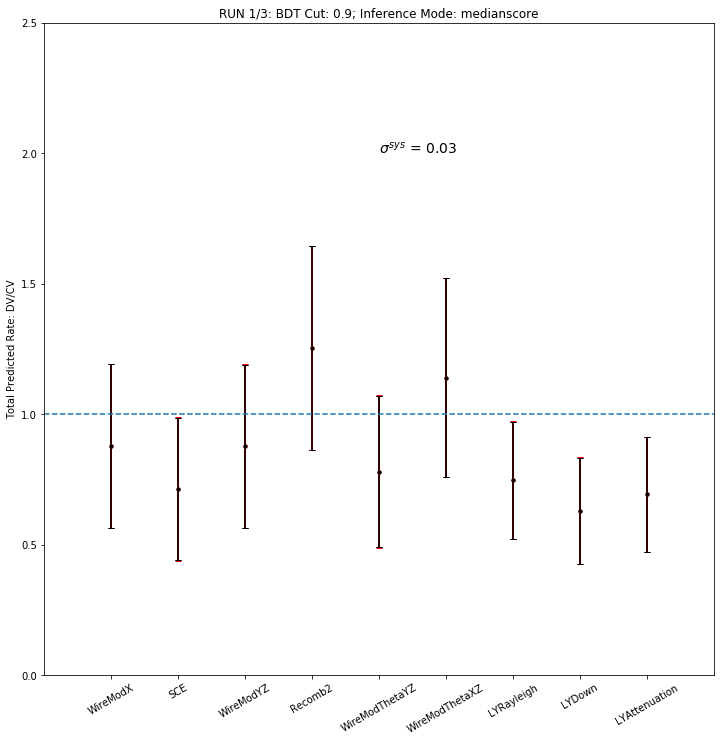

3.486919351077623 3.774136466283382
3.9832196741140358 4.581578472503217
2.708288640137014 3.774136466283382
6.4465930553285045 4.581578472503217
2.407602283179436 3.774136466283382
3.9107256037993956 3.774136466283382
4.13876220755107 4.581578472503217
3.5506142817792528 4.581578472503217
3.1765597847939704 4.581578472503217


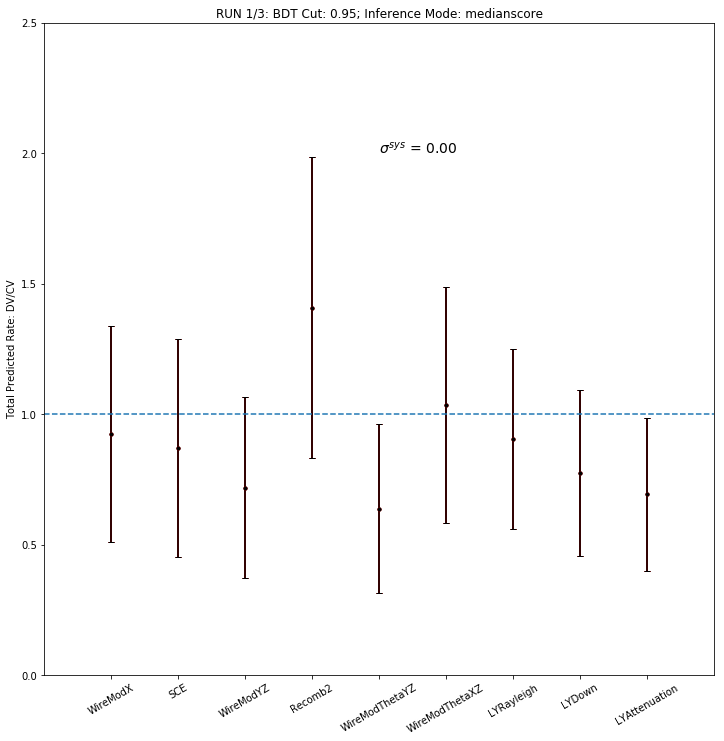

13.172806437404361 10.293099453500131
13.65168540213461 14.061162149192704
11.220052937710495 10.293099453500131
21.84410505447122 14.061162149192704
12.439278463093753 10.293099453500131
15.251829854817633 10.293099453500131
16.16441989608962 14.061162149192704
12.072088558049456 14.061162149192704
14.496513976855084 14.061162149192704


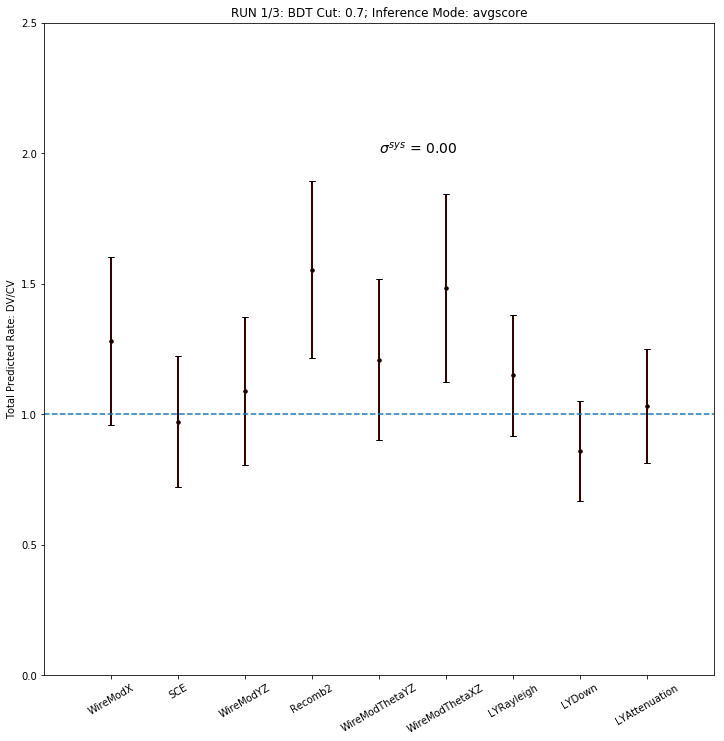

12.010499987045153 8.577582877916774
10.2476326425496 11.538203567389509
9.285561051898338 8.577582877916774
18.342550094753 11.538203567389509
9.229142085521172 8.577582877916774
13.296467052917937 8.577582877916774
12.414815758284512 11.538203567389509
9.108915771352734 11.538203567389509
10.666836855058909 11.538203567389509


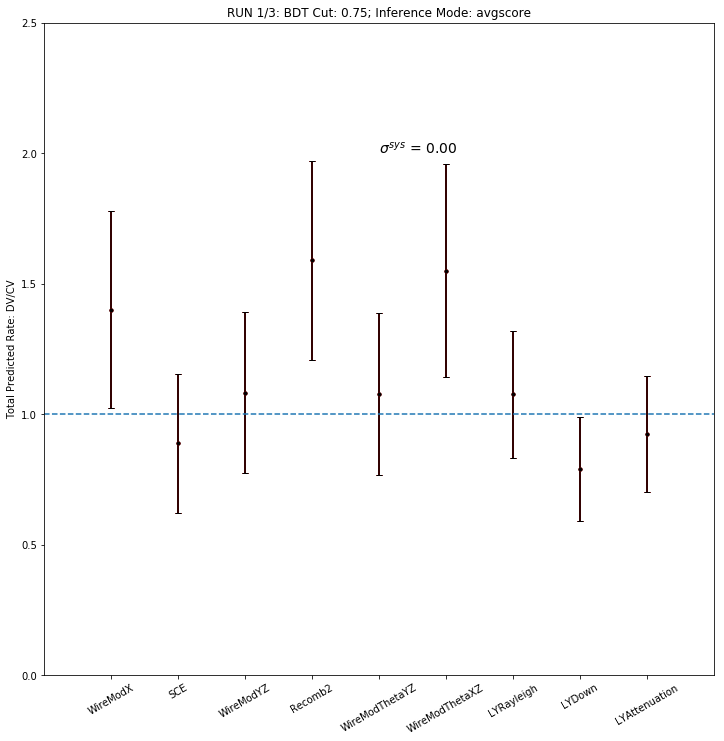

10.073322569779805 6.862066302333418
8.24715421454394 9.553539656399538
6.9641707889237505 6.862066302333418
15.35891044681493 9.553539656399538
7.624073896734881 6.862066302333418
10.558959130258362 6.862066302333418
10.733857292070589 9.553539656399538
8.276111553723563 9.553539656399538
8.509978212323421 9.553539656399538


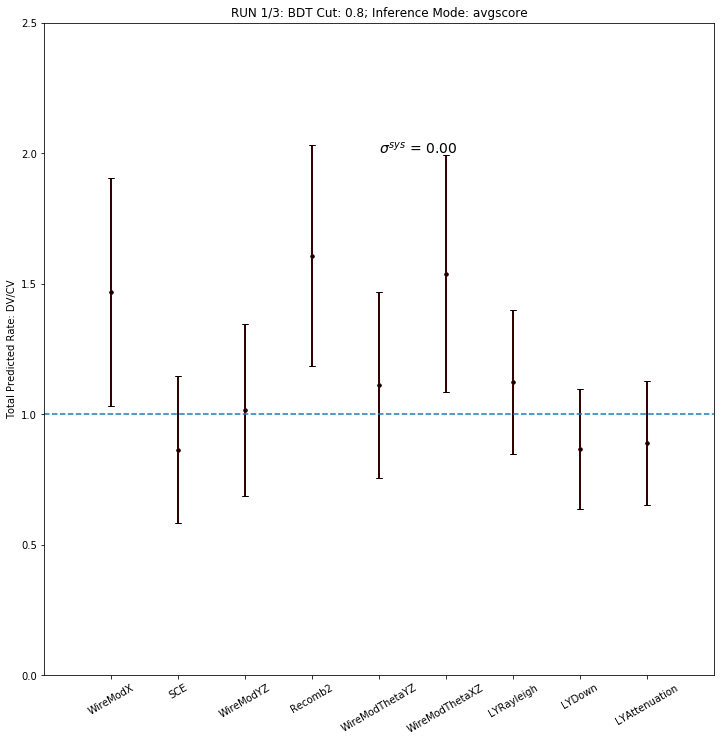

7.361274185608318 6.175859672100077
6.825842701067305 8.05989101994636
5.803475657436459 6.175859672100077
12.135613919150677 8.05989101994636
5.216471613555445 6.175859672100077
8.212523767978727 6.175859672100077
6.984253154265478 8.05989101994636
6.145742984656012 8.05989101994636
6.235663210969424 8.05989101994636


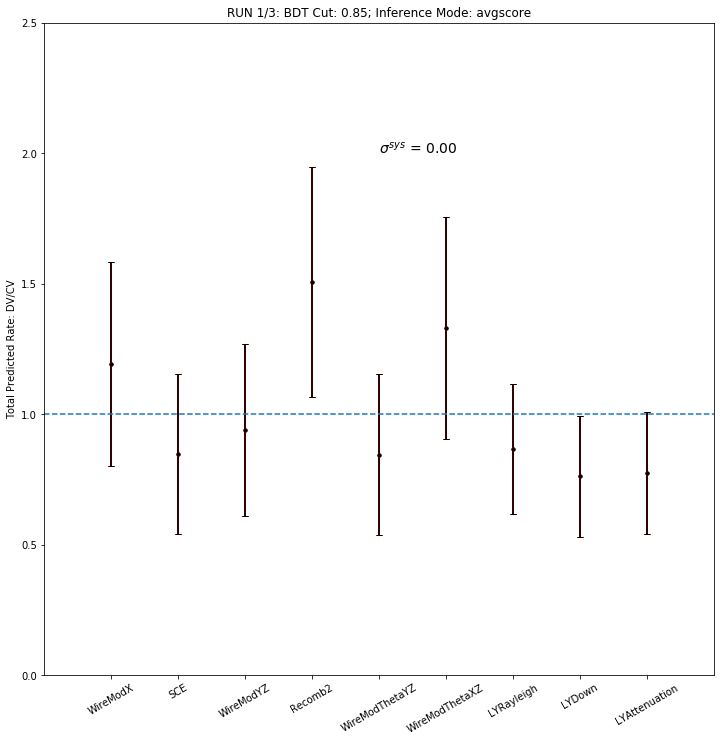

5.036661284889901 4.803446411633394
5.4045311875906705 6.059467310197581
3.4820853944618753 4.803446411633394
9.19057582354039 6.059467310197581
3.2101363775725815 4.803446411633394
6.64823352645897 4.803446411633394
5.562243113092624 6.059467310197581
4.602815910670991 6.059467310197581
4.680301090527254 6.059467310197581


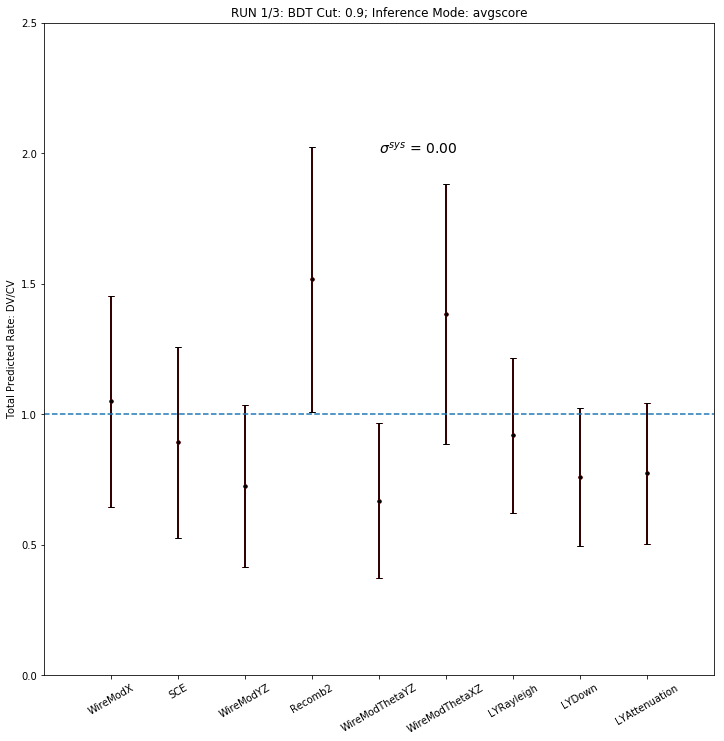

2.7120483841714846 1.7155165755833552
3.9832196741140358 2.253811246396579
1.934491885812153 1.7155165755833552
5.8900761912205715 2.253811246396579
2.0063352359828635 1.7155165755833552
3.1285804830395163 1.7155165755833552
3.75107500217381 2.253811246396579
2.7178100641500818 2.253811246396579
2.758355165028799 2.253811246396579


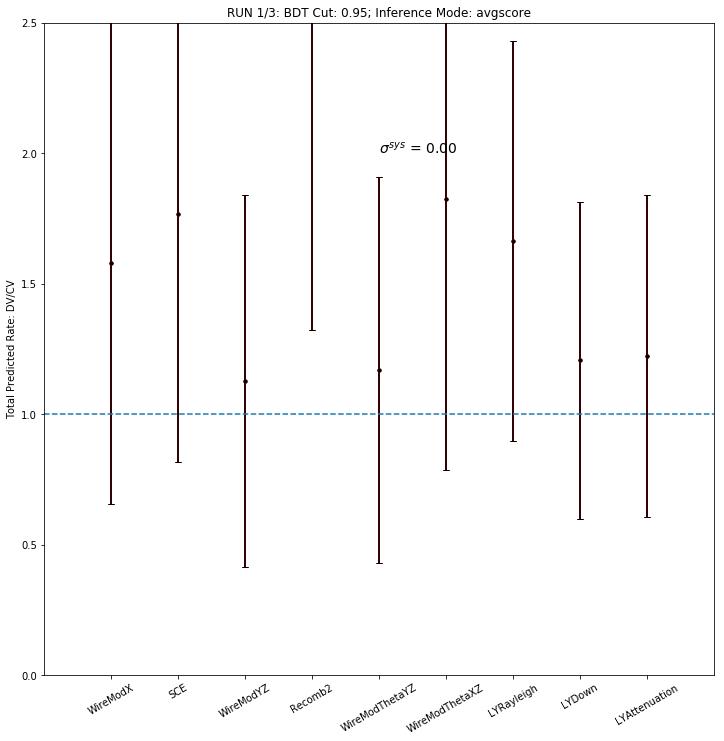

(0.7, 'fracweight') Sig sys: 0.00
(0.75, 'fracweight') Sig sys: 0.00
(0.8, 'fracweight') Sig sys: 0.00
(0.85, 'fracweight') Sig sys: 0.00
(0.9, 'fracweight') Sig sys: 0.00
(0.95, 'fracweight') Sig sys: 0.00
(0.7, 'medianscore') Sig sys: 0.00
(0.75, 'medianscore') Sig sys: 0.00
(0.8, 'medianscore') Sig sys: 0.00
(0.85, 'medianscore') Sig sys: 0.00
(0.9, 'medianscore') Sig sys: 0.03
(0.95, 'medianscore') Sig sys: 0.00
(0.7, 'avgscore') Sig sys: 0.00
(0.75, 'avgscore') Sig sys: 0.00
(0.8, 'avgscore') Sig sys: 0.00
(0.85, 'avgscore') Sig sys: 0.00
(0.9, 'avgscore') Sig sys: 0.00
(0.95, 'avgscore') Sig sys: 0.00


In [19]:


def getsigmasys(devs,errs):
    for sigsys in np.arange(0.0,3.0,0.01):
        mom2 = np.average(devs/(errs**2+sigsys**2))
        if mom2 < 1: return sigsys
    

rateCV = {}
errCV = {}
for mode in modelist:
    for sigcut in sigcutlist:
        key = tuple((sigcut,mode))
        rateCV[key] = {}
        errCV[key] = {}
        
        for k in wvec3.keys():
        
            if k in wvec1.keys() and k != 'LYAtt': wvecCV = np.concatenate((DAT_POT1*wvec1['CV'][key],DAT_POT3*wvec3['CV'][key]))
            else: wvecCV = DAT_POT3*wvec3['CV'][key]
            print(k,sum(wvecCV>0))
            rateCV[key][k] = sum(wvecCV)
            errCV[key][k] = np.sqrt(sum(wvecCV**2))
    
r13 = {}
count=0
plotdir = 'Plots/'+tag+'/numuSystematics/'
try: os.mkdir(plotdir)
except OSError as error: print(error)
for mode in modelist:
    for sigcut in sigcutlist:
        key = tuple((sigcut,mode))
        fig,ax = plt.subplots(1,1,figsize=(12,12))
        xlabellist = []
        devs,errs = [],[]
        ratiodict = {}
        errdict = {}
        i = 0
        for k in wvec3.keys():
            if k=='CV': continue
            xlabellist.append(k)
            if k in wvec1.keys() and k != 'LYAtt': wvec = np.concatenate((DAT_POT1*wvec1[k][key],DAT_POT3*wvec3[k][key]))
            else: wvec = DAT_POT3*wvec3[k][key]
            rateDV = sum(wvec)
            errDV = np.sqrt(sum(wvec**2))
            ratio = rateDV/rateCV[key][k]
            print(rateDV,rateCV[key][k])
            err = ratio * np.sqrt(errCV[key][k]**2/rateCV[key][k]**2 + errDV**2/rateDV**2)
            if rateDV==0: err = 1
            ratiodict[k]= ratio
            errdict[k] = err
            ax.errorbar([i],[ratio],yerr=[err],label=k,fmt='.k',capsize=3)
            i += 1
            if k != 'CV':
                devs.append((ratio - 1)**2)
                errs.append(err)
  
        sigsys = getsigmasys(np.array(devs),np.array(errs))
        ax.text(len(xlabellist)/2,2.0,r'$\sigma^{sys}$ = %2.2f'%sigsys,fontsize=14)
        r13[key] = sigsys
        
        i = 0
        for k in wvec3.keys():
            if k=='CV': continue
            ax.errorbar([i],[ratiodict[k]],yerr=[np.sqrt(errdict[k]**2 + sigsys**2)],label=k,fmt='.',capsize=3,color='red')
            ax.errorbar([i],[ratiodict[k]],yerr=[errdict[k]],label=k,fmt='.k',capsize=3)
            i += 1
        
        ax.plot([-1,len(xlabellist)],[1,1],linestyle='--')
        ax.set_xlim(-1,len(xlabellist))
        ax.set_ylim(0,2.5)
        ax.set_ylabel('Total Predicted Rate: DV/CV')
        x = np.arange(len(xlabellist))
        ax.set_xticks(x)
        ax.set_xticklabels(xlabellist,rotation=30)
        ax.set_title('RUN 1/3: BDT Cut: %s; Inference Mode: %s'%key)
        plt.savefig(plotdir+'numu_detsys_plot%i'%(count))
        plt.show()
        count+=1
        
for mode in modelist:
    for sigcut in sigcutlist:
        key = tuple((sigcut,mode))
        print(key,'Sig sys: %2.2f'%r13[key])